# Matplotlib and pylab inline

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Add path .. to make relative import

In [2]:
import sys

sys.path.insert(0, '..')

# Import libraries

In [3]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

from matplotlib import rcParams
from src.preparation.reading import *
from src.processing.standardization import standardize_image
from src.processing.preprocessing import preproc_image
from src.processing.noise import get_scalar_product_precentiles
from src.processing.holes import get_horizontal_vertical_mean_percentiles
from src.processing.pants import r_max_and_ds_percentiles

from pandas import DataFrame

rcParams["figure.dpi"] = 100
rcParams["figure.figsize"] = (4, 5)
rcParams["image.cmap"] = "gray"

## Read image

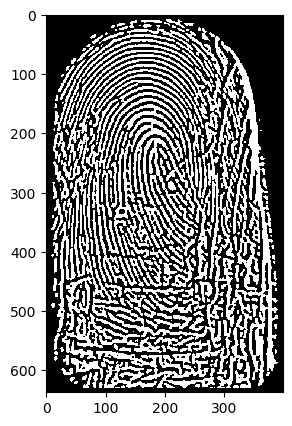

In [4]:
im = read_random_image(RAW_FILE_PATH_GOODIM)
std_im = standardize_image(im)
prep_im = preproc_image(std_im)

plt.imshow(prep_im)
plt.show()

In [5]:

get_scalar_product_precentiles(prep_im)

array([-0.69725286,  0.76936439,  0.91812076,  0.97213789])

In [6]:
get_horizontal_vertical_mean_percentiles(prep_im)

array([105.1875    , 115.3875    , 126.8625    , 152.3625    ,
       103.9184953 , 119.50626959, 133.09561129, 151.48119122,
       104.55      , 116.6625    , 130.05      , 155.55      ,
       107.51567398, 122.46394984, 134.29467085, 151.0815047 ])

In [7]:
r_max_and_ds_percentiles(prep_im)

array([0.06263728, 0.09514429, 0.18997243, 0.02852312, 0.04654039,
       0.43848312, 0.16187525, 0.21405179, 0.27750025, 3.        ,
       3.        , 6.        , 4.        , 5.        , 9.        ,
       3.        , 3.        , 6.        ])

In [8]:
def features(im, sp_ksize=13, sp_precs=[0, 20, 40, 60], hv_percs=[30, 60, 90, 100],
             r_percs=[90, 95, 100], ds_percs=[90, 95, 100]):
    feats = np.array([])
    
    sp = get_scalar_product_precentiles(im, ksize=sp_ksize, percs=sp_precs)
    hv_means = get_horizontal_vertical_mean_percentiles(im, percs=hv_percs)
    rds = r_max_and_ds_percentiles(im, r_percs=r_percs, ds_percs=ds_percs)
    
    feats = np.append(feats, sp)
    feats = np.append(feats, hv_means)
    feats = np.append(feats, rds)
    
    return feats

In [9]:
%time
features(prep_im)

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 3.81 µs


array([-6.97252856e-01,  7.69364390e-01,  9.18120757e-01,  9.72137888e-01,
        1.05187500e+02,  1.15387500e+02,  1.26862500e+02,  1.52362500e+02,
        1.03918495e+02,  1.19506270e+02,  1.33095611e+02,  1.51481191e+02,
        1.04550000e+02,  1.16662500e+02,  1.30050000e+02,  1.55550000e+02,
        1.07515674e+02,  1.22463950e+02,  1.34294671e+02,  1.51081505e+02,
        6.26372753e-02,  9.51442898e-02,  1.89972426e-01,  2.85231200e-02,
        4.65403919e-02,  4.38483116e-01,  1.61875248e-01,  2.14051788e-01,
        2.77500248e-01,  3.00000000e+00,  3.00000000e+00,  6.00000000e+00,
        4.00000000e+00,  5.00000000e+00,  9.00000000e+00,  3.00000000e+00,
        3.00000000e+00,  6.00000000e+00])

# Use Linear SVC for image classification

## Function for getting data

In [10]:
def get_xy_ims(filepath, images, x, y, y_val=1):
    
    for name in os.listdir(filepath):
        path = filepath + name
        im = cv.imread(path, cv.IMREAD_GRAYSCALE)
        
        if path == None:
            continue
        
        std_im = standardize_image(im)
        prep_im = preproc_image(std_im)
        percentiles = features(prep_im)

        images.append(prep_im)
        x.append(percentiles)
        y.append(y_val)
    

## Get data

In [11]:
images, x, y = [], [], []


get_xy_ims(RAW_FILE_PATH_GOODIM, images, x, y)
get_xy_ims(RAW_FILE_PATH_SCANS, images, x, y)
get_xy_ims(RAW_FILE_PATH_BADIM_PANTS, images, x, y, y_val=0)
get_xy_ims(RAW_FILE_PATH_BADIM_HOLES, images, x, y, y_val=0)
get_xy_ims(RAW_FILE_PATH_BADIM_NOISE, images, x, y, y_val=0)

images = np.array(images)
x = np.array(x)
y = np.array(y)

DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.773435,0.837977,0.959609,0.988923,93.7125,112.8375,130.68750,162.5625,101.792007,116.060359,...,0.245907,5.0,6.0,9.0,3.0,3.0,7.0,3.0,3.0,6.0
1,-0.593497,0.842832,0.965206,0.990244,90.7800,110.7975,127.62750,184.2375,97.980296,114.729064,...,0.186313,3.0,4.0,7.0,3.0,3.0,7.0,3.0,4.0,4.0
2,-0.779732,0.703158,0.888623,0.963238,96.2625,112.2000,131.32500,160.6500,99.654682,115.560201,...,0.169213,4.0,4.0,7.0,3.3,4.0,8.0,4.0,4.0,7.0
3,-0.733292,0.768380,0.926636,0.979313,94.3500,107.7375,120.80625,173.4000,99.313679,114.830189,...,0.226304,3.0,4.0,7.0,3.0,4.0,7.0,3.0,3.0,5.0
4,-0.662931,0.844986,0.963206,0.989969,93.0750,108.3750,123.03750,179.1375,96.507075,116.674528,...,0.263584,4.0,4.0,8.0,3.0,4.0,6.0,3.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,-0.730607,0.546708,0.741547,0.856051,100.0875,116.0250,131.32500,162.5625,98.568075,119.718310,...,0.276374,3.0,4.0,7.0,3.0,4.0,7.0,3.0,4.0,6.0
109,-0.658457,0.501672,0.700239,0.823707,92.4375,109.6500,127.88250,164.4750,91.037008,113.244094,...,0.177381,4.0,4.0,7.0,4.0,5.0,7.0,4.0,4.0,8.0
110,-0.564976,0.594953,0.779079,0.880109,98.8125,112.8375,125.58750,195.0750,101.443058,120.697348,...,0.211106,3.0,3.0,6.0,4.0,4.0,7.0,3.0,4.0,6.0
111,-0.674568,0.646245,0.831229,0.923356,98.1750,111.9450,124.24875,174.0375,96.219453,116.430868,...,0.195484,4.0,4.0,8.0,3.0,4.0,6.0,3.0,4.0,6.0


## Train LinearSVC and get

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc = LinearSVC(max_iter=100000000)
svc.fit(x, y)

predict = svc.predict(x)
bool_predict = predict != y


for im, good, percs in zip(images[bool_predict], y[bool_predict], x[bool_predict]):
    
    if good:
        print("Является хорошим, считается плохим", percs)
    else:
        print("Является плохим, считается хорошим", percs)
    
    plt.imshow(im, cmap=plt.cm.gray)
    plt.show()
    
print("Done")

Done


[1]


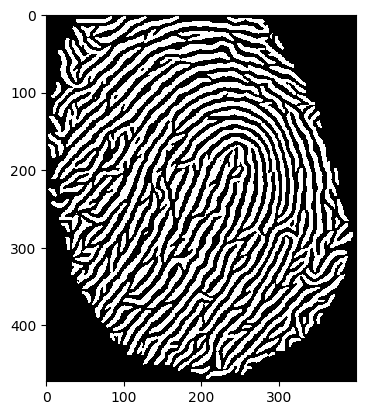

[0]


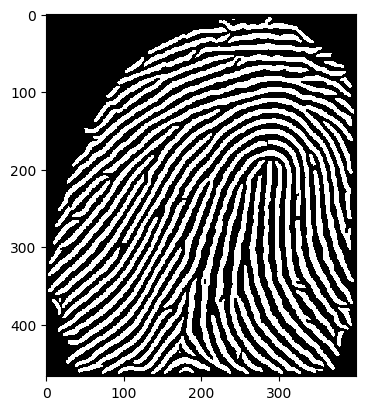

[1]


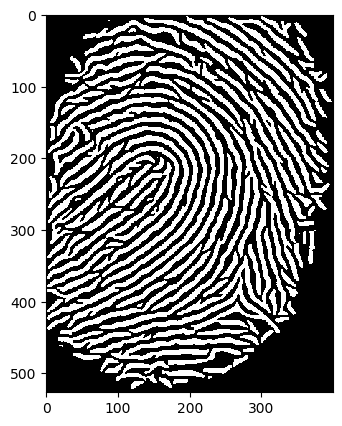

[0]


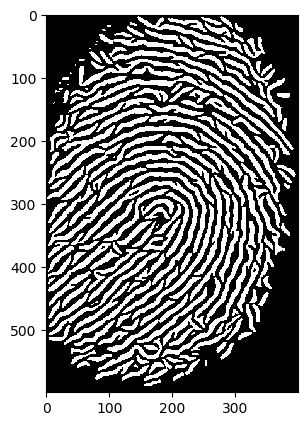

[0]


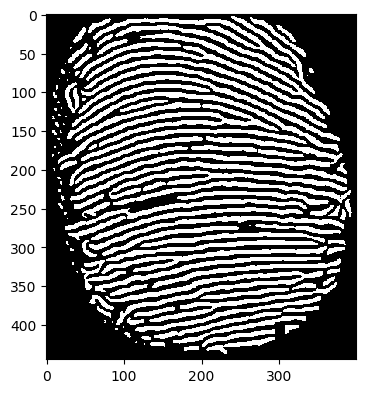

[1]


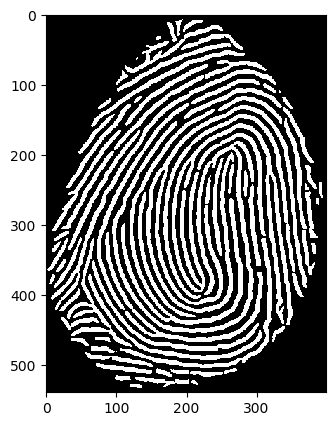

[1]


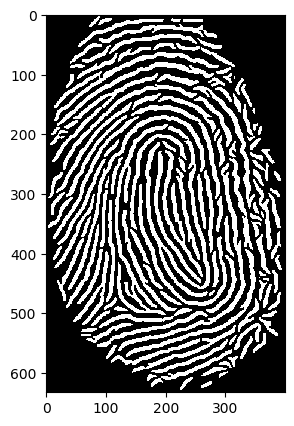

[1]


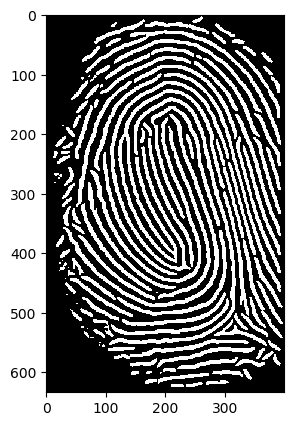

[1]


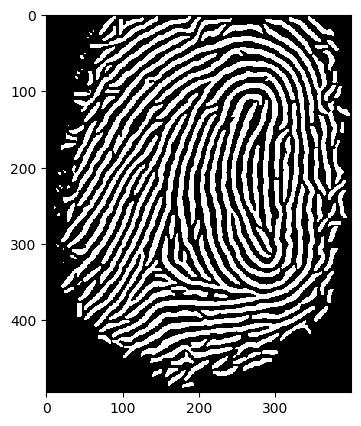

[1]


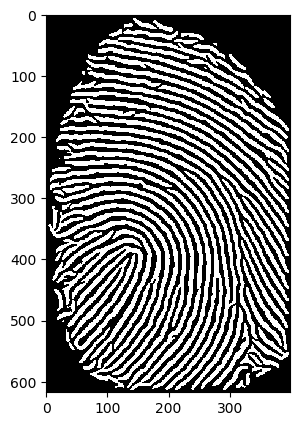

[0]


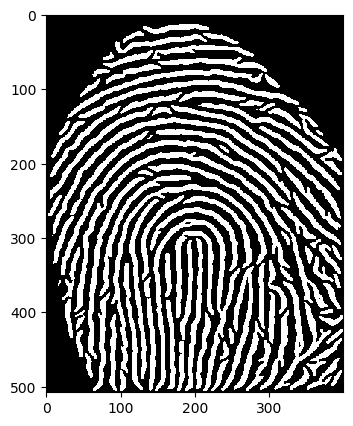

[1]


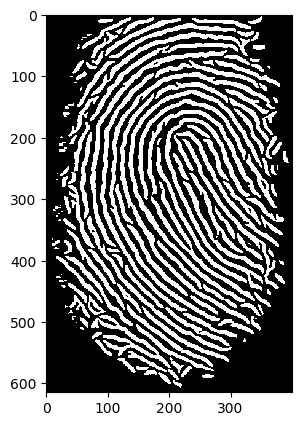

[0]


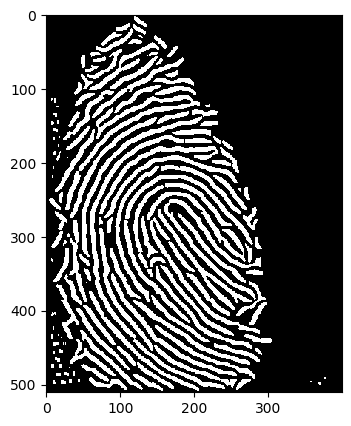

[1]


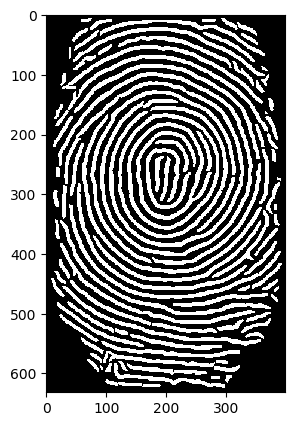

[1]


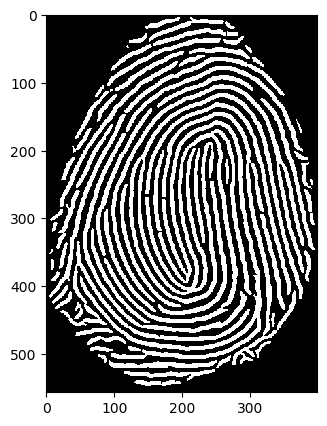

[1]


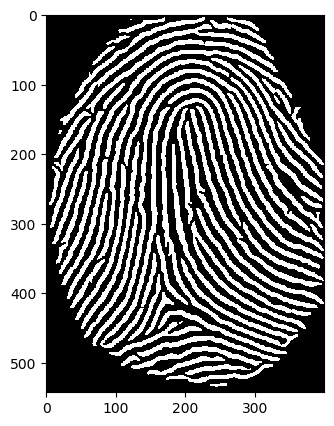

[0]


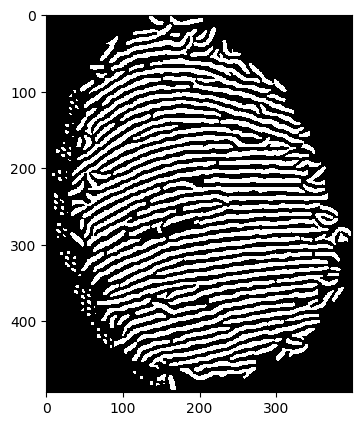

[1]


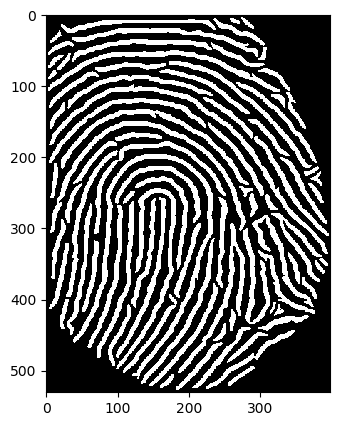

[1]


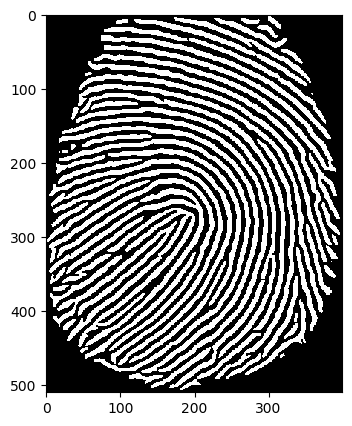

[0]


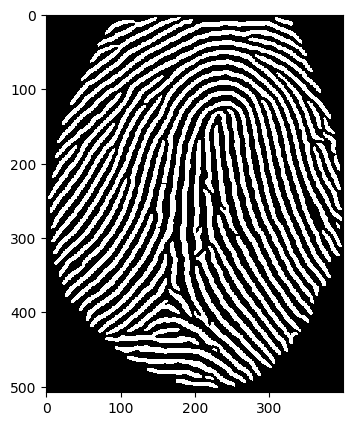

[1]


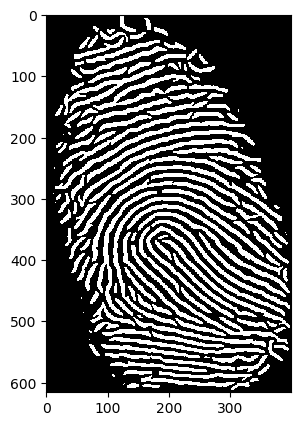

[1]


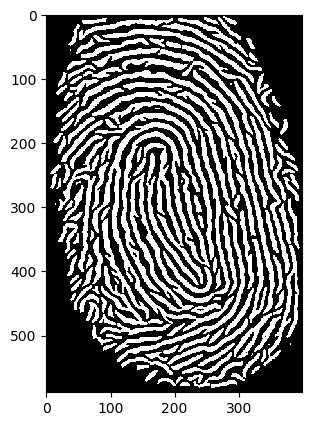

[1]


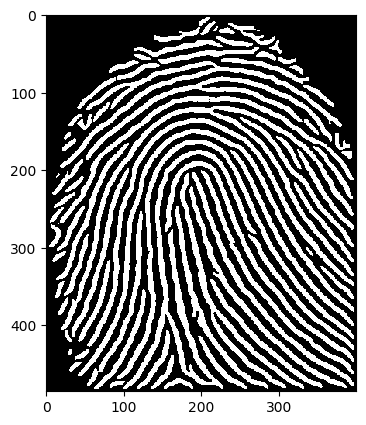

[0]


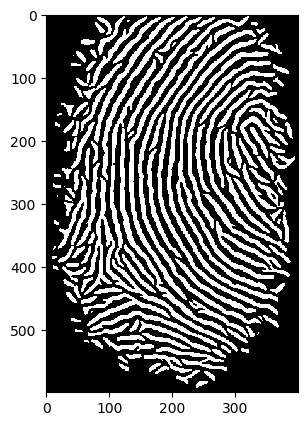

[0]


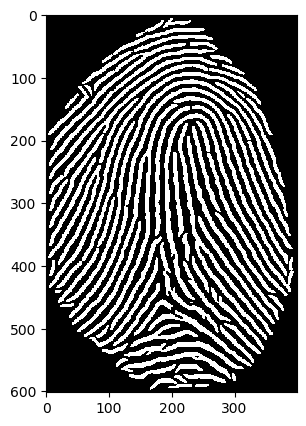

[1]


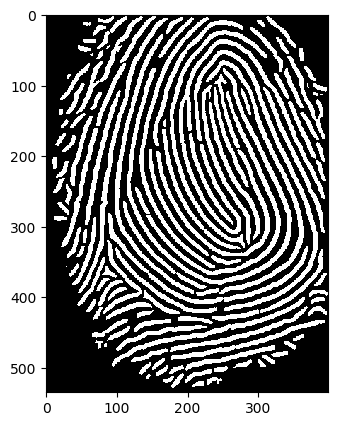

[1]


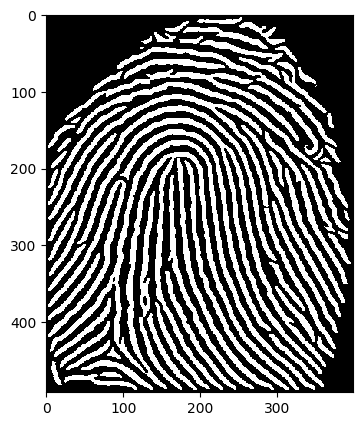

[1]


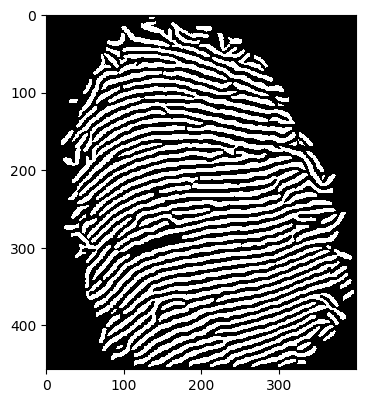

[1]


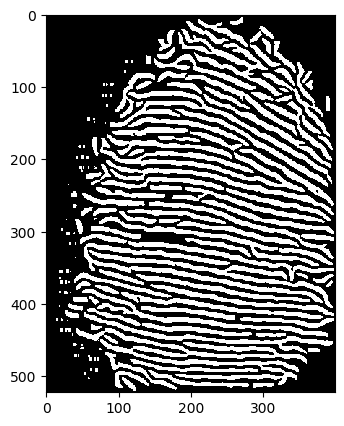

[1]


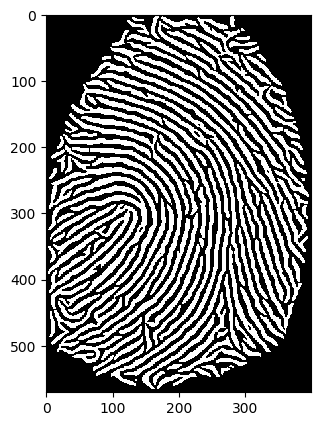

[0]


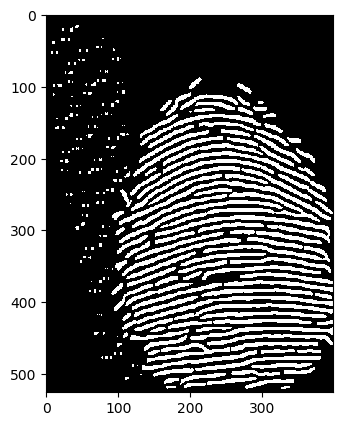

[1]


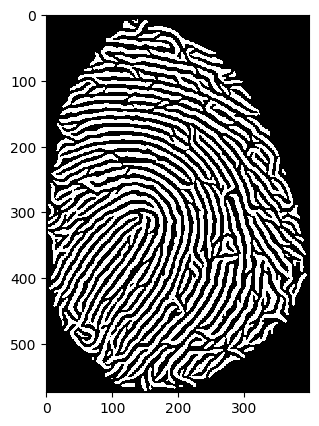

[1]


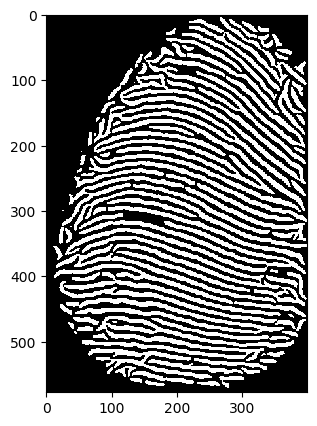

[1]


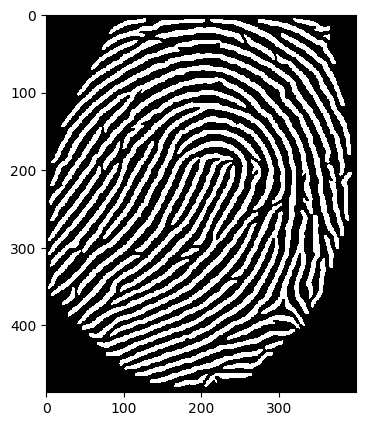

[1]


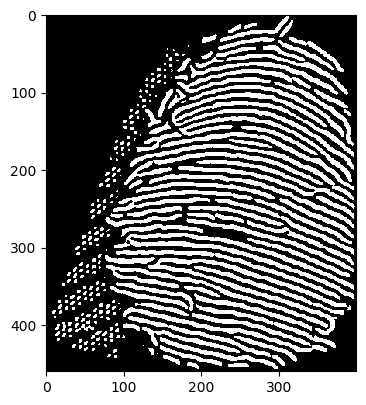

[1]


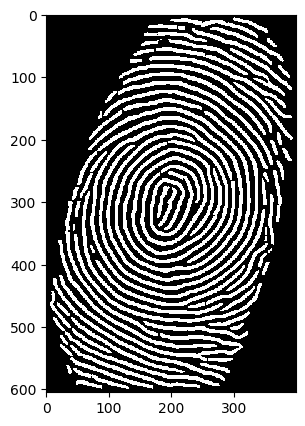

[1]


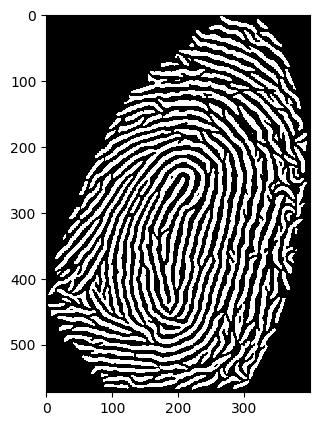

[1]


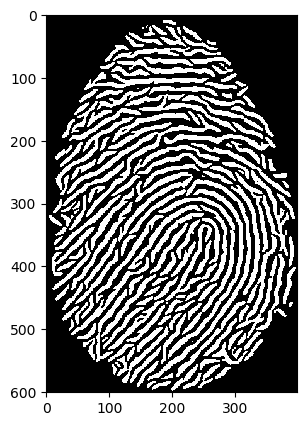

[0]


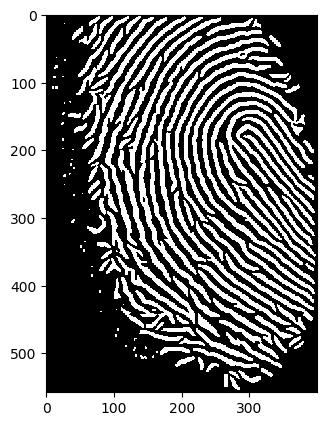

[1]


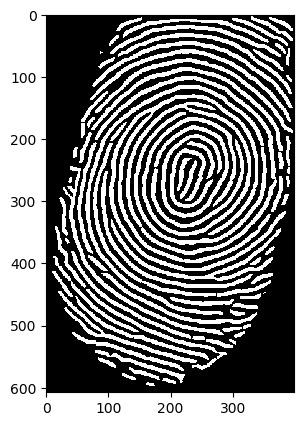

[1]


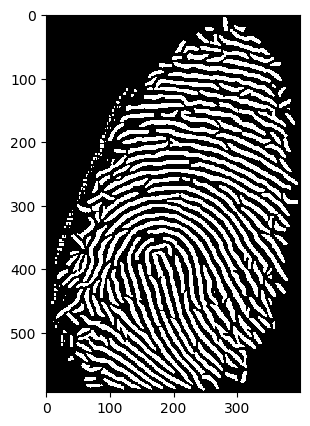

[1]


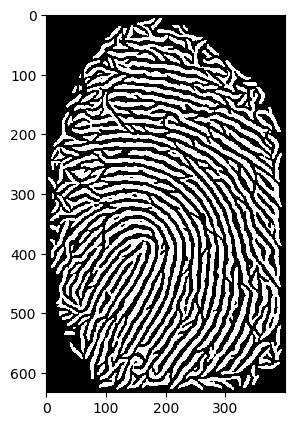

[1]


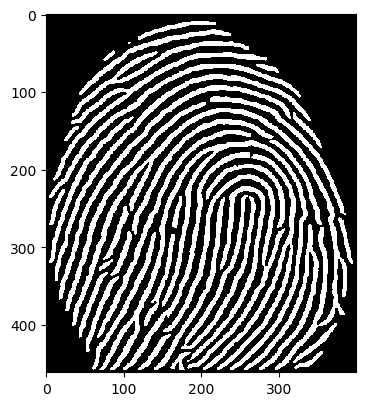

[1]


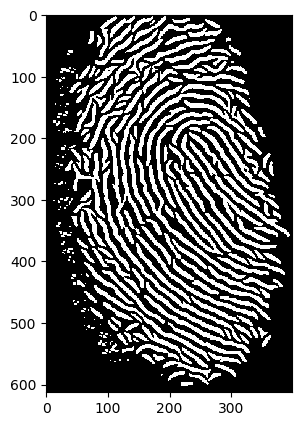

[1]


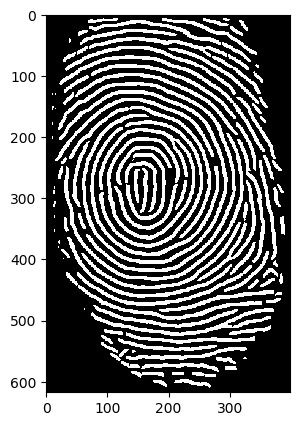

[1]


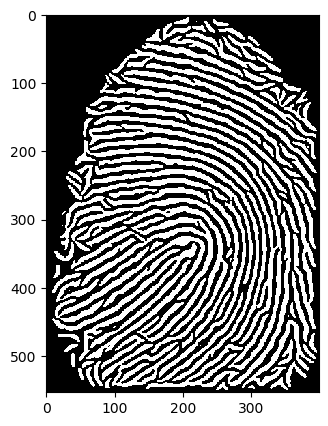

[1]


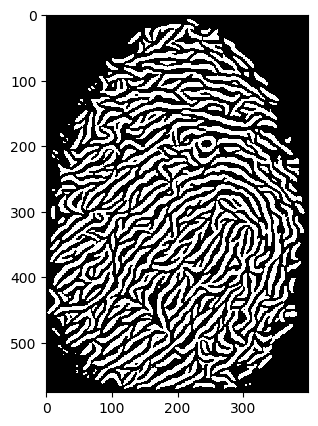

[1]


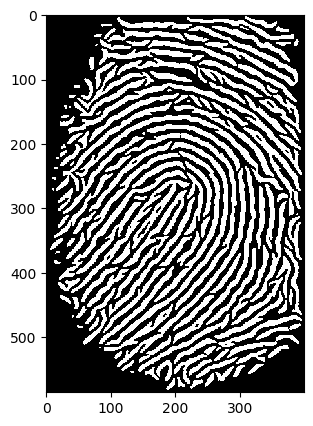

[1]


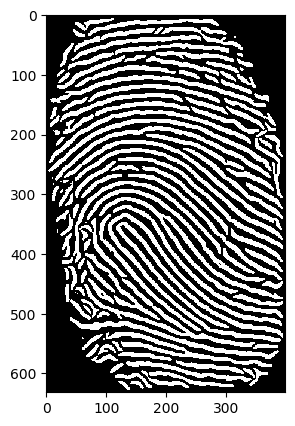

[0]


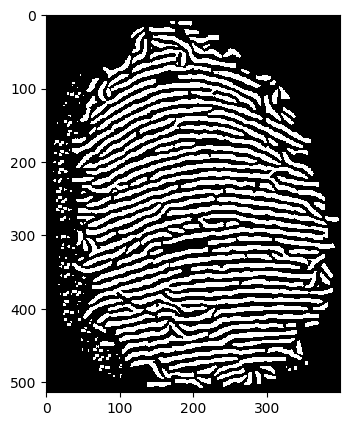

[0]


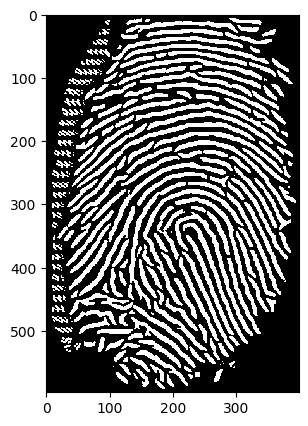

[1]


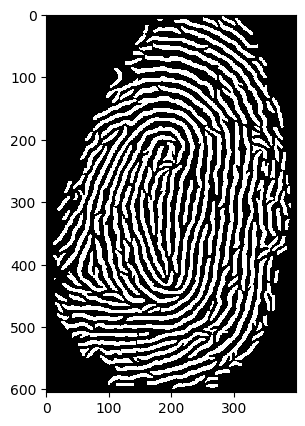

[1]


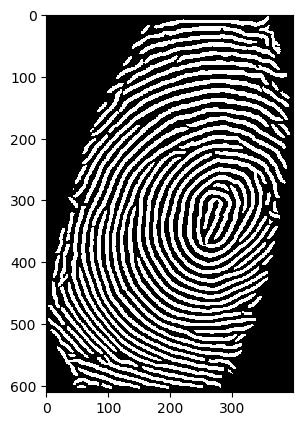

[1]


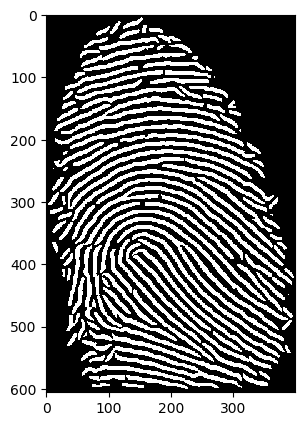

[1]


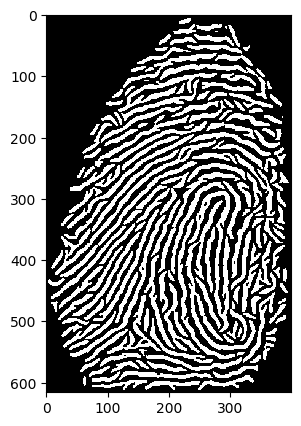

[1]


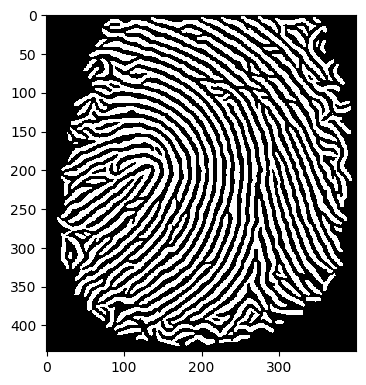

[1]


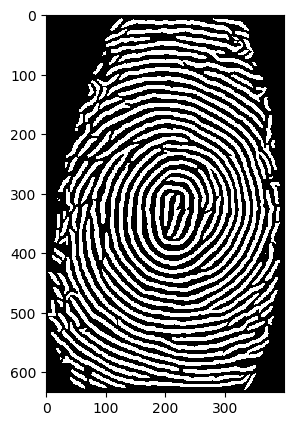

[1]


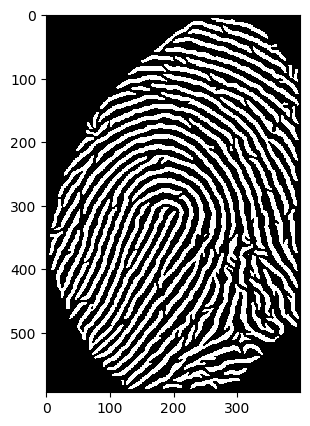

[0]


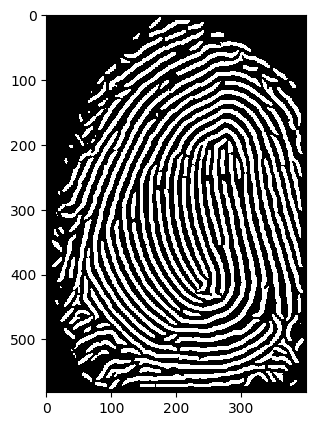

[1]


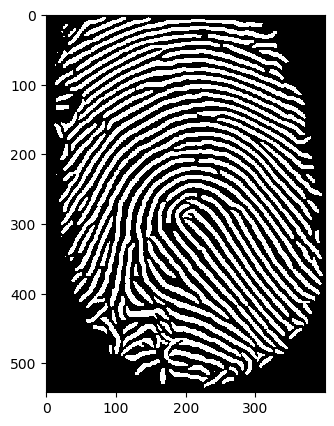

[0]


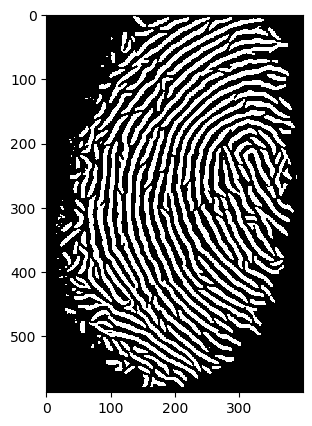

[1]


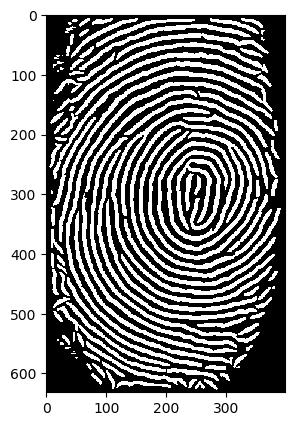

[1]


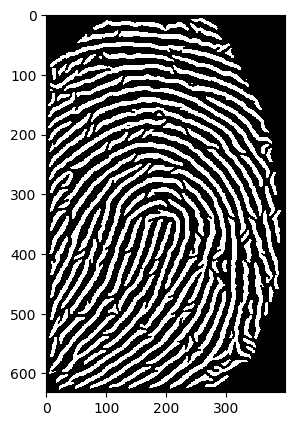

[0]


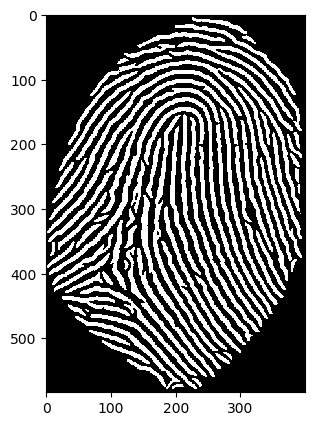

[1]


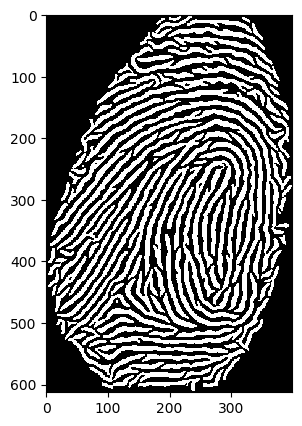

[0]


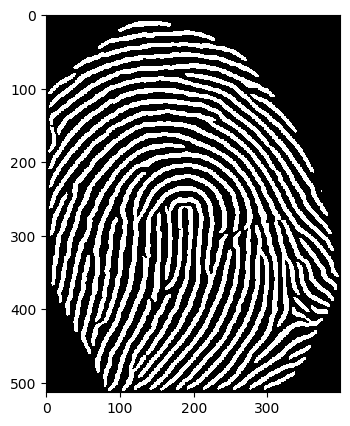

[0]


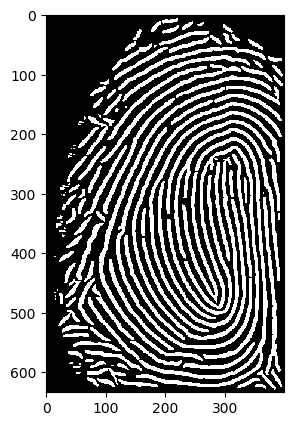

[0]


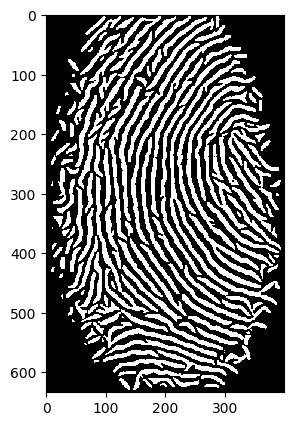

[1]


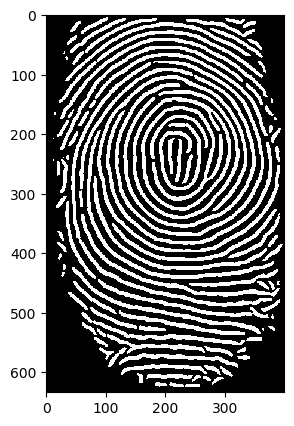

[1]


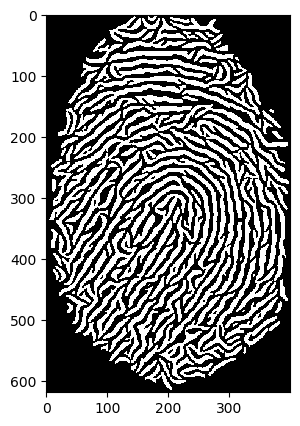

[0]


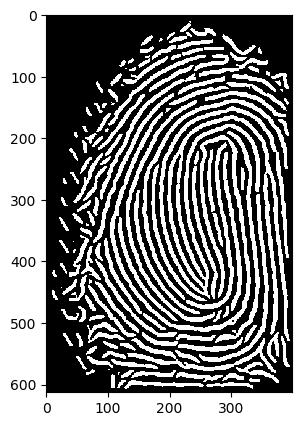

[1]


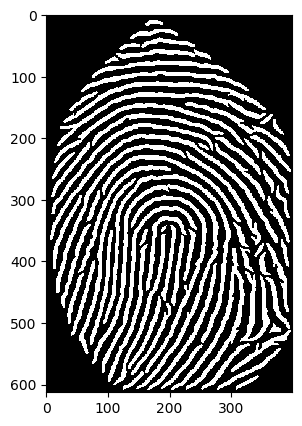

[0]


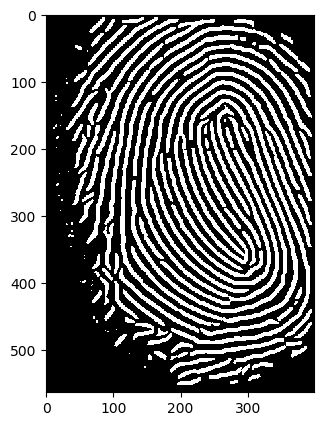

[0]


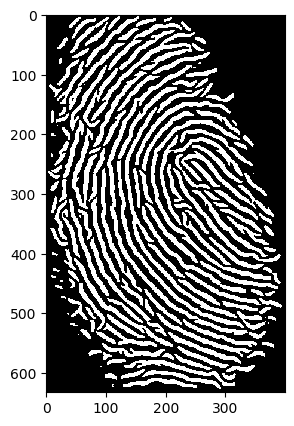

[0]


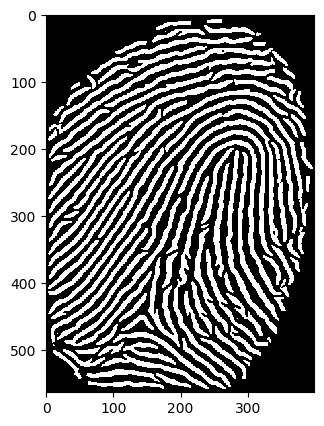

[0]


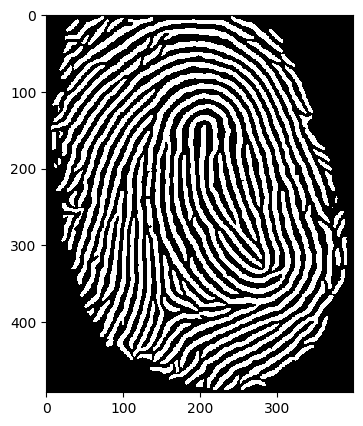

[1]


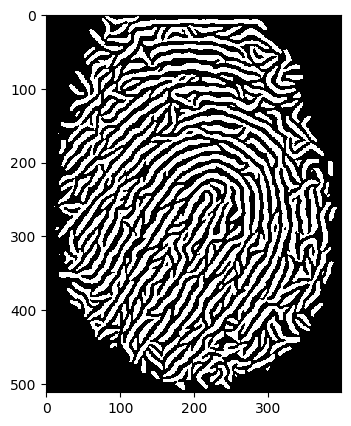

[0]


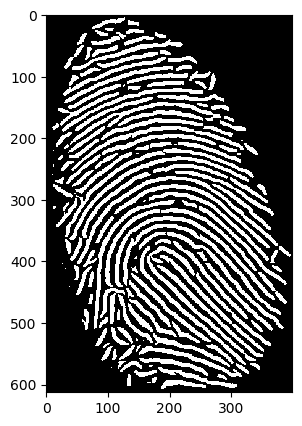

[1]


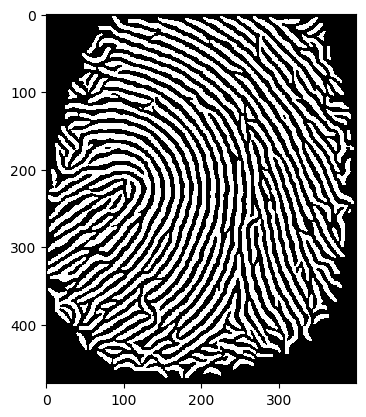

[0]


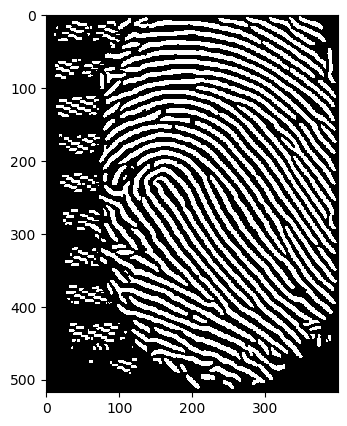

In [13]:
from src.processing.standardization import invers_color
from src.processing.preprocessing import coherence_filter

FILE_PATH = "/home/developer/Desktop/Data base fingerprints/DB4_B/"

for name in os.listdir(FILE_PATH):
        path = FILE_PATH + name
        im = cv.imread(path, cv.IMREAD_GRAYSCALE)
        
        if path == None:
            continue

        
        std_im = standardize_image(im)
        std_im = coherence_filter(std_im, n_iter=9)
        prep_im = preproc_image(std_im)
        percentiles = features(prep_im)
        
        print(svc.predict(percentiles.reshape(1, -1)))
        plt.imshow(prep_im)
        plt.show()
        
        